In [1]:
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
import numpy as np

# from matplotlib.mlab import PCA as mlabPCA # deprecated
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

edu_df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [19]:
print(edu_df)

             PRIMARY_KEY          STATE  YEAR     ENROLL  TOTAL_REVENUE  \
209         1996_ALABAMA        ALABAMA  1996   735912.0      3365113.0   
211         1996_ARIZONA        ARIZONA  1996   764681.0      4143304.0   
212        1996_ARKANSAS       ARKANSAS  1996   452907.0      2183384.0   
213      1996_CALIFORNIA     CALIFORNIA  1996  5460484.0     31282981.0   
214        1996_COLORADO       COLORADO  1996   655679.0      3891203.0   
...                  ...            ...   ...        ...            ...   
1245       2015_VIRGINIA       VIRGINIA  2015  1279867.0     15857524.0   
1246     2015_WASHINGTON     WASHINGTON  2015  1072359.0     13709442.0   
1247  2015_WEST_VIRGINIA  WEST_VIRGINIA  2015   279565.0      3478401.0   
1248      2015_WISCONSIN      WISCONSIN  2015   861813.0     11637376.0   
1249        2015_WYOMING        WYOMING  2015    93867.0      1962874.0   

      FEDERAL_REVENUE  STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
209          334858.0    

In [18]:
edu_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413 entries, 209 to 1249
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   413 non-null    object 
 1   STATE                         413 non-null    object 
 2   YEAR                          413 non-null    int64  
 3   ENROLL                        413 non-null    float64
 4   TOTAL_REVENUE                 413 non-null    float64
 5   FEDERAL_REVENUE               413 non-null    float64
 6   STATE_REVENUE                 413 non-null    float64
 7   LOCAL_REVENUE                 413 non-null    float64
 8   TOTAL_EXPENDITURE             413 non-null    float64
 9   INSTRUCTION_EXPENDITURE       413 non-null    float64
 10  SUPPORT_SERVICES_EXPENDITURE  413 non-null    float64
 11  OTHER_EXPENDITURE             413 non-null    float64
 12  CAPITAL_OUTLAY_EXPENDITURE    413 non-null    float64
 13  GR

In [4]:
edu_df = edu_df[edu_df["AVG_MATH_4_SCORE"].notna()]
edu_df = edu_df[edu_df["AVG_MATH_8_SCORE"].notna()]
edu_df = edu_df[edu_df["AVG_READING_4_SCORE"].notna()]
edu_df = edu_df[edu_df["AVG_READING_8_SCORE"].notna()]

edu_df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,394904.0,160299.0,562613.0,221.023429,272.398433,213.480890,266.419687
6,1992_CONNECTICUT,CONNECTICUT,1992,NaN,3834302.0,143542.0,1342539.0,2348221.0,3721338.0,2148041.0,...,38058.0,33691.0,28366.0,304284.0,126917.0,436932.0,226.798480,273.739345,222.417599,264.713904
7,1992_DELAWARE,DELAWARE,1992,NaN,645233.0,45945.0,420942.0,178346.0,638784.0,372722.0,...,8272.0,8012.0,6129.0,67495.0,28338.0,96296.0,217.899972,262.868585,206.389052,261.577921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,2017_VIRGINIA,VIRGINIA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,248.041059,290.081407,227.598382,273.402640
1488,2017_WASHINGTON,WASHINGTON,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,241.701001,289.131257,223.123409,267.744778
1489,2017_WEST_VIRGINIA,WEST_VIRGINIA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,236.057019,273.415854,217.316396,271.617023
1490,2017_WISCONSIN,WISCONSIN,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.389213,288.143144,219.612694,258.700304


## 1) Compute the average score for each row for all students weighted properly by grade. In other words, each row will have its own average. Notice that the number of students in the 4th grade isn't the same as the number of students in the 8th grade. So, you should appropriately weigh the scores.

In [5]:
edu_df["AVG_SCORE_ALL"] = (edu_df["AVG_MATH_4_SCORE"] +
                           edu_df["AVG_MATH_8_SCORE"] +
                           edu_df["AVG_READING_4_SCORE"] +
                           edu_df["AVG_READING_8_SCORE"]) / 4
edu_df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,AVG_SCORE_ALL
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895,237.250705
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665,234.943060
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,45025.0,34533.0,394904.0,160299.0,562613.0,221.023429,272.398433,213.480890,266.419687,243.330610
6,1992_CONNECTICUT,CONNECTICUT,1992,NaN,3834302.0,143542.0,1342539.0,2348221.0,3721338.0,2148041.0,...,33691.0,28366.0,304284.0,126917.0,436932.0,226.798480,273.739345,222.417599,264.713904,246.917332
7,1992_DELAWARE,DELAWARE,1992,NaN,645233.0,45945.0,420942.0,178346.0,638784.0,372722.0,...,8012.0,6129.0,67495.0,28338.0,96296.0,217.899972,262.868585,206.389052,261.577921,237.183883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,2017_VIRGINIA,VIRGINIA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,248.041059,290.081407,227.598382,273.402640,259.780872
1488,2017_WASHINGTON,WASHINGTON,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,241.701001,289.131257,223.123409,267.744778,255.425111
1489,2017_WEST_VIRGINIA,WEST_VIRGINIA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,236.057019,273.415854,217.316396,271.617023,249.601573
1490,2017_WISCONSIN,WISCONSIN,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,240.389213,288.143144,219.612694,258.700304,251.711339


## 2) What are the correlations between this newly created score variable and the expenditure types? Which 1 of the expenditure types is more correlated than the others?


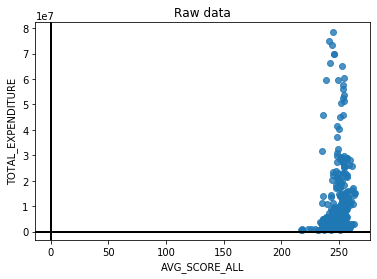

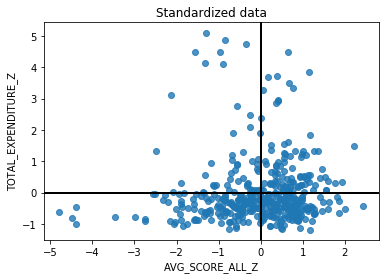

In [6]:
t = sns.regplot(
    'AVG_SCORE_ALL',
    'TOTAL_EXPENDITURE',
    edu_df,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
#t.set(xlim=(-1, 11), ylim=(-1, 11))
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()

# Standardizing variables by subtracting the mean and dividing by the standard
# deviation. Now both variables are on the same scale.
edu_st_df = pd.DataFrame()
edu_st_df['AVG_SCORE_ALL_Z'] = (edu_df['AVG_SCORE_ALL'] - edu_df['AVG_SCORE_ALL'].mean()) / edu_df['AVG_SCORE_ALL'].std()
edu_st_df['TOTAL_EXPENDITURE_Z'] = (edu_df['TOTAL_EXPENDITURE'] - edu_df['TOTAL_EXPENDITURE'].mean()) / edu_df['TOTAL_EXPENDITURE'].std()

t = sns.regplot(
    'AVG_SCORE_ALL_Z',
    'TOTAL_EXPENDITURE_Z',
    edu_st_df,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')
plt.show()

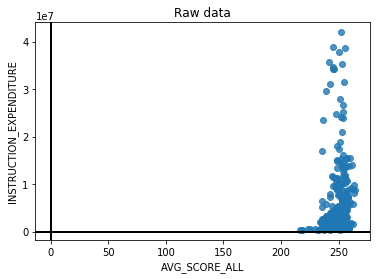

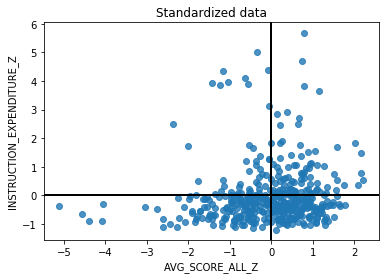

In [7]:
t = sns.regplot(
    'AVG_SCORE_ALL',
    'INSTRUCTION_EXPENDITURE',
    edu_df,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
#t.set(xlim=(-1, 11), ylim=(-1, 11))
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()

# Standardizing variables by subtracting the mean and dividing by the standard
# deviation. Now both variables are on the same scale.
edu_st_df = pd.DataFrame()
edu_st_df['AVG_SCORE_ALL_Z'] = (edu_df['AVG_SCORE_ALL'] - edu_df['AVG_SCORE_ALL'].mean()) / edu_df['AVG_SCORE_ALL'].std()
edu_st_df['INSTRUCTION_EXPENDITURE_Z'] = (edu_df['INSTRUCTION_EXPENDITURE'] - edu_df['INSTRUCTION_EXPENDITURE'].mean()) / edu_df['INSTRUCTION_EXPENDITURE'].std()

t = sns.regplot(
    'AVG_SCORE_ALL_Z',
    'INSTRUCTION_EXPENDITURE_Z',
    edu_st_df,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')
plt.show()

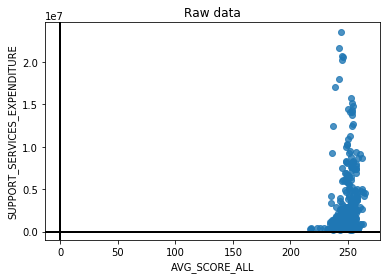

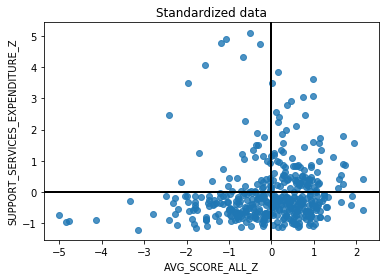

In [8]:
t = sns.regplot(
    'AVG_SCORE_ALL',
    'SUPPORT_SERVICES_EXPENDITURE',
    edu_df,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
#t.set(xlim=(-1, 11), ylim=(-1, 11))
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()

# Standardizing variables by subtracting the mean and dividing by the standard
# deviation. Now both variables are on the same scale.
edu_st_df = pd.DataFrame()
edu_st_df['AVG_SCORE_ALL_Z'] = (edu_df['AVG_SCORE_ALL'] - edu_df['AVG_SCORE_ALL'].mean()) / edu_df['AVG_SCORE_ALL'].std()
edu_st_df['SUPPORT_SERVICES_EXPENDITURE_Z'] = (edu_df['SUPPORT_SERVICES_EXPENDITURE'] - edu_df['SUPPORT_SERVICES_EXPENDITURE'].mean()) / edu_df['SUPPORT_SERVICES_EXPENDITURE'].std()

t = sns.regplot(
    'AVG_SCORE_ALL_Z',
    'SUPPORT_SERVICES_EXPENDITURE_Z',
    edu_st_df,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')
plt.show()

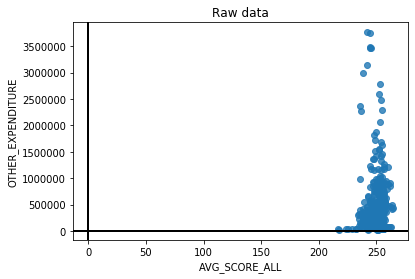

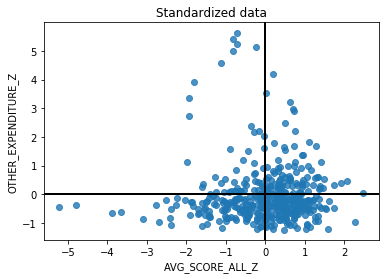

In [9]:
t = sns.regplot(
    'AVG_SCORE_ALL',
    'OTHER_EXPENDITURE',
    edu_df,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
#t.set(xlim=(-1, 11), ylim=(-1, 11))
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()

# Standardizing variables by subtracting the mean and dividing by the standard
# deviation. Now both variables are on the same scale.
edu_st_df = pd.DataFrame()
edu_st_df['AVG_SCORE_ALL_Z'] = (edu_df['AVG_SCORE_ALL'] - edu_df['AVG_SCORE_ALL'].mean()) / edu_df['AVG_SCORE_ALL'].std()
edu_st_df['OTHER_EXPENDITURE_Z'] = (edu_df['OTHER_EXPENDITURE'] - edu_df['OTHER_EXPENDITURE'].mean()) / edu_df['OTHER_EXPENDITURE'].std()

t = sns.regplot(
    'AVG_SCORE_ALL_Z',
    'OTHER_EXPENDITURE_Z',
    edu_st_df,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')
plt.show()

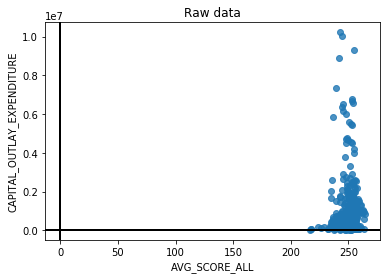

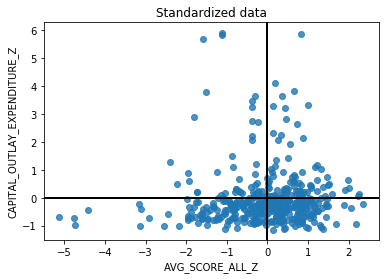

In [10]:
t = sns.regplot(
    'AVG_SCORE_ALL',
    'CAPITAL_OUTLAY_EXPENDITURE',
    edu_df,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
#t.set(xlim=(-1, 11), ylim=(-1, 11))
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()

# Standardizing variables by subtracting the mean and dividing by the standard
# deviation. Now both variables are on the same scale.
edu_st_df = pd.DataFrame()
edu_st_df['AVG_SCORE_ALL_Z'] = (edu_df['AVG_SCORE_ALL'] - edu_df['AVG_SCORE_ALL'].mean()) / edu_df['AVG_SCORE_ALL'].std()
edu_st_df['CAPITAL_OUTLAY_EXPENDITURE_Z'] = (edu_df['CAPITAL_OUTLAY_EXPENDITURE'] - edu_df['CAPITAL_OUTLAY_EXPENDITURE'].mean()) / edu_df['CAPITAL_OUTLAY_EXPENDITURE'].std()

t = sns.regplot(
    'AVG_SCORE_ALL_Z',
    'CAPITAL_OUTLAY_EXPENDITURE_Z',
    edu_st_df,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')
plt.show()

## 3) Now, apply PCA to the 4 expenditure types. How much of the total variance is explained by the 1st component?


In [11]:
edu_df = edu_df.dropna()
edu_rev_df = edu_df[["TOTAL_EXPENDITURE", "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE", 
                     "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE"]]
edu_rev_df

,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
209,3572283.0,1987018.0,935115.0,322883.0,286699.0
211,4391555.0,1860007.0,1193260.0,220650.0,877190.0
212,2297381.0,1264275.0,636106.0,127007.0,203555.0
213,31561692.0,16880730.0,9222569.0,2362407.0,2580639.0
214,4075165.0,2052264.0,1127563.0,143767.0,588209.0
...,...,...,...,...,...
1245,16113212.0,8755896.0,5075509.0,627473.0,1086722.0
1246,13630138.0,6508964.0,4510672.0,546926.0,1601069.0
1247,3466981.0,1819903.0,1161944.0,233836.0,232738.0
1248,11553677.0,5723474.0,3691809.0,513402.0,894823.0


In [12]:
# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.
X = StandardScaler().fit_transform(edu_rev_df)

# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[1.00242718 0.99225105 0.99569565 0.94340386 0.93088228]
 [0.99225105 1.00242718 0.97723853 0.90094734 0.88749974]
 [0.99569565 0.97723853 1.00242718 0.95031458 0.91765767]
 [0.94340386 0.90094734 0.95031458 1.00242718 0.92388912]
 [0.93088228 0.88749974 0.91765767 0.92388912 1.00242718]]


In [13]:
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[-0.45608722 -0.44640245 -0.45411019 -0.44241716 -0.43676114]
Eigenvalue 1: 4.771552964176984
----------------------------------------
Eigenvector 2: 
[-0.24624032 -0.54710469 -0.23026979  0.39286856  0.65777829]
Eigenvalue 2: 0.1463365041532068
----------------------------------------
Eigenvector 3: 
[ 0.0865191   0.20640342 -0.13876589 -0.75180904  0.60451573]
Eigenvalue 3: 0.07903402048439648
----------------------------------------
Eigenvector 4: 
[-0.85054872  0.40550958  0.31531757  0.03998209  0.10538082]
Eigenvalue 4: 0.0005515521753164756
----------------------------------------
Eigenvector 5: 
[ 0.02077202 -0.54255038  0.78871961 -0.28828101  0.00480084]
Eigenvalue 5: 0.014660881340186102
----------------------------------------
The percentage of total variance in the dataset explained by each component calculated by hand.
 [9.51999913e-01 2.91964357e-02 1.57685310e-02 1.10043340e-04
 2.92507657e-03]


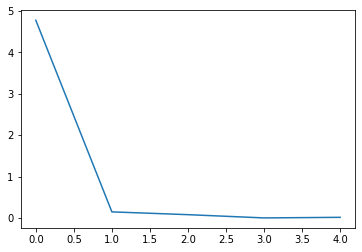

[4.77155296e+00 1.46336504e-01 7.90340205e-02 5.51552175e-04
 1.46608813e-02]


In [14]:
# print scree plot
plt.plot(eig_val_cov)
plt.show()

print(eig_val_cov)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.95199991]


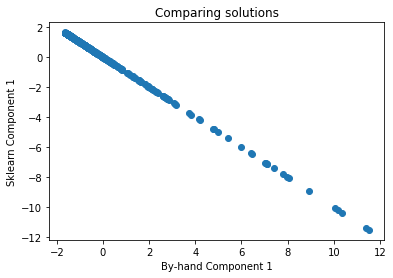

In [15]:
sklearn_pca = PCA(n_components=1)
Y_sklearn = sklearn_pca.fit_transform(X)

P = eig_vec_cov[:, 0]

# Transform X into Y.
Y = P.T.dot(Xt)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

# Compare the sklearn solution to ours – a perfect match.
plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Comparing solutions')
plt.ylabel('Sklearn Component 1')
plt.xlabel('By-hand Component 1')
plt.show()

## 4) What is the correlation between the overall score variable and the 1st principal component?


## 5) If you were to choose the best variables for your model, would you prefer using the 1st principal component instead of the expenditure variables? Why?

In [23]:
print(edu_df["GRADES_4_G"].sum())
print(edu_df["GRADES_8_G"].sum())

29476429.0
29754214.0
